# Data Wrangling - Trips

### Import Data

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import datetime
import math

import seaborn as sns
sns.set()

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
font = {'size'   : 50}
matplotlib.rc('font', **font)

LABEL_FONT_SIZE = 15
TITLE_FONT_SIZE = 25

## Import Data

In [4]:
print('Loading Trip Data...')

try:
    file_path_slug = '../../../datasets/cogobikeshare/*_Trip_Data.csv'

    # glob all files
    file_list = glob(file_path_slug)
    print(file_list)

    counter = 1
    chunks = []
    chunk_counter = 1
    chunksize = 10000
    num_chunks = 0
    for file in file_list:
        num_chunks += math.ceil(sum(1 for row in open(file, 'r'))/chunksize)

    
    # load data from each file
    for file in file_list:


        # import file in chunks
        for chunk in pd.read_csv(file, chunksize=chunksize, iterator=True):

            # append chunk to chunks list
            chunks.append(chunk)
            
            if chunk_counter == 1 or chunk_counter % math.ceil(num_chunks/10) == 0 or chunk_counter == num_chunks:
                print('\t[%s] finished chunk %s of %s' % (datetime.datetime.now().time(), chunk_counter, num_chunks))
            chunk_counter += 1
            
        print('Finished file! (%d of %d)' % (counter, len(file_list)))
        counter += 1
    
    trip_import = pd.DataFrame()
    trip_import = pd.concat(chunks)



    print('Data Loaded Successfully!')

except:
    print('oops... something went wrong importing the data :(')

Loading Trip Data...
['../../../datasets/cogobikeshare/2017-08_COGO_Trip_Data.csv']
	[16:25:17.003981] finished chunk 1 of 21
	[16:25:17.092315] finished chunk 3 of 21
	[16:25:17.193787] finished chunk 6 of 21
	[16:25:17.306689] finished chunk 9 of 21
	[16:25:17.413458] finished chunk 12 of 21
	[16:25:17.521244] finished chunk 15 of 21
	[16:25:17.636654] finished chunk 18 of 21
	[16:25:17.711798] finished chunk 21 of 21
Finished file! (1 of 1)
Data Loaded Successfully!


In [5]:
trip_import.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201579 entries, 0 to 201578
Data columns (total 12 columns):
trip_id              201579 non-null int64
start_time           201579 non-null object
end_time             201579 non-null object
bikeid               201579 non-null int64
tripduration         201579 non-null int64
from_station_id      201579 non-null int64
from_station_name    201579 non-null object
to_station_id        201579 non-null int64
to_station_name      201579 non-null object
usertype             201579 non-null object
gender               72102 non-null object
birthyear            72196 non-null float64
dtypes: float64(1), int64(5), object(6)
memory usage: 20.0+ MB


## Utility Functions

In [25]:
def clean_trip_frame(df):
    
    
    df.rename(columns={'bikeid' : 'bike_id', 
                       'tripduration' : 'duration', 
                       'usertype' : 'user_type', 
                       'birthyear' : 'birth_year'}, inplace=True)
    
    df['trip_id']            = df['trip_id'].astype('int')
    df['start_time']         = pd.to_datetime(df['start_time'], format="%m/%d/%Y %H:%M")
    df['end_time']           = pd.to_datetime(df['end_time'],   format="%m/%d/%Y %H:%M")
    df['bike_id']            = df['bike_id'].astype('int')
    df['duration']           = df['duration'].astype('int')
    df['from_station_id']    = df['from_station_id'].astype('int')
    df['to_station_id']      = df['to_station_id'].astype('int')
    df['user_type']          = df['user_type'].astype('category')
    df['gender']             = df['gender'].astype('category')

    df['birth_year'].fillna(0, inplace=True)    
    df['birth_year']         = df['birth_year'].astype('int')
    
    df.rename(columns={'start_time' : 'start_date', 
                       'end_time' : 'end_date'}, inplace=True)
    

    
    # add 'duration_minutes' column
    df['duration_minutes'] = df['duration'] / 60.
    df['duration_minutes'] = df['duration_minutes'].astype('float')
    
    return df

# def plot_terminal_trips(df, id, date_range = (pd.Timestamp('2013-08-01'), pd.Timestamp('2016-10-01')), x_label = 'Date', y_label = 'Trips', title_suffix='', draw_dates=[]):
    
#     def group_terminal(df, start=True):
#         ''' group by start or end terminal trips per day
#         '''
        
#         term = pd.DataFrame()
#         if start:
#             term = df[df['start_terminal'] == id]
#         else:
#             term = df[df['end_terminal'] == id]
#         term.set_index('start_date', inplace=True)
#         g_term = term.groupby(term.index.date)['trip_id'].count()
        
#         return g_term
    
        
#     start_term = group_terminal(df, start=True)
#     end_term   = group_terminal(df, start=False)
    
#     ax = start_term.plot(kind='line', color='c', alpha=0.75, figsize=(24,3))
#     end_term.plot(kind='line', color='g', alpha=0.75, ax=ax)
    
#     ax.set_xlim(date_range)
#     if title_suffix != '':
#         title = 'Station %s - %s' % (id, title_suffix)
#     elif y_label != '':
#         title = 'Station %s - %s' % (id, y_label)
#     else:
#         title = 'Station %s' % id
#     ax.set_title(title, size=TITLE_FONT_SIZE, weight='bold')
#     ax.set_xlabel(x_label, size=LABEL_FONT_SIZE, weight='bold')
#     ax.set_ylabel(y_label, size=LABEL_FONT_SIZE, weight='bold')
    
#     ax.legend(['Start Terminal', 'End Terminal'], loc=1)
    
#     if len(draw_dates) > 0:
#         for xc in draw_dates:
#             ax.axvline(x=xc, color='k', linestyle=':', alpha=0.5)
#     plt.show()
    
    
# def date_fixes(df, old_terminal, new_terminal, change_date):
    
#     print('[%s]\tUpdating %s to %s for dates after %s' % (datetime.datetime.now().time(), old_terminal, new_terminal, change_date))

# #     t_min = pd.Timestamp('2013-05-01')
# #     t_max = pd.Timestamp('2016-10-01')
    
#     for station in [old_terminal, new_terminal]:
#         plot_terminal_trips(df, station, title_suffix='PRE DATE FIX', draw_dates=[change_date])
        
#     # Fix A to B - Start Terminal
#     print('[%s]\tStarted indexing...' % datetime.datetime.now().time())
#     index_to_update_start = df[(df.start_terminal == old_terminal) & (df.start_date >= change_date)].index
#     df.loc[index_to_update_start, 'start_terminal'] = new_terminal
#     print('\t[%s]\tComplete!' % datetime.datetime.now().time())    

#     # Fix A to B - End Terminal
#     print('[%s]\tStarted Update...' % datetime.datetime.now().time())
#     index_to_update_end   = df[(df.end_terminal == old_terminal) & (df.end_date >= change_date)].index
#     df.loc[index_to_update_end, 'end_terminal'] = new_terminal
#     print('\t[%s]\tComplete!' % datetime.datetime.now().time())
    
    
#     # Fix B to A - Start Terminal
#     print('[%s]\tStarted indexing...' % datetime.datetime.now().time())
#     index_to_update_start = df[(df.start_terminal == new_terminal) & (df.start_date < change_date)].index
#     df.loc[index_to_update_start, 'start_terminal'] = old_terminal
#     print('\t[%s]\tComplete!' % datetime.datetime.now().time())    

#     # Fix B to A - End Terminal
#     print('[%s]\tStarted Update...' % datetime.datetime.now().time())
#     index_to_update_end   = df[(df.end_terminal == new_terminal) & (df.end_date < change_date)].index
#     df.loc[index_to_update_end, 'end_terminal'] = old_terminal
#     print('\t[%s]\tComplete!' % datetime.datetime.now().time())
    

#     for station in [old_terminal, new_terminal]:
#         plot_terminal_trips(df, station, draw_dates=[change_date])
    
#     return df

# Clean Data

- Format zip codes to take only first 5 digits, this data is self reported and often wrongly input per Bay Area Bike Share Notes
- Prune out Trips greater than 60 minutes long
- Adjust records for station relocations and renaming

In [26]:
# clean data frames
print('[%s] Trip Data Cleanup Started' % datetime.datetime.now().time())
trip_clean = clean_trip_frame(trip_import.copy())

print('[%s] Merging Trip Data' % datetime.datetime.now().time())
trip_data = trip_clean.copy()
trip_data.drop_duplicates(inplace=True)
trip_data.sort_values('trip_id', inplace=True)
trip_data.reset_index(inplace=True, drop=True)

print('[%s] Cleanup Complete!' % datetime.datetime.now().time())

[16:33:34.604012] Trip Data Cleanup Started
[16:33:36.741352] Merging Trip Data
[16:33:36.979684] Cleanup Complete!


In [27]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201579 entries, 0 to 201578
Data columns (total 13 columns):
trip_id              201579 non-null int64
start_date           201579 non-null datetime64[ns]
end_date             201579 non-null datetime64[ns]
bike_id              201579 non-null int64
duration             201579 non-null int64
from_station_id      201579 non-null int64
from_station_name    201579 non-null object
to_station_id        201579 non-null int64
to_station_name      201579 non-null object
user_type            201579 non-null category
gender               72102 non-null category
birth_year           201579 non-null int64
duration_minutes     201579 non-null float64
dtypes: category(2), datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 17.3+ MB


In [28]:
trip_data.head(3)

,trip_id,start_date,end_date,bike_id,duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birth_year,duration_minutes
0,236,2013-07-28 14:50:00,2013-07-28 15:22:00,287,1897,30,Parsons Ave & Oak St,24,High St & 2nd Ave,Customer,NaN,0,31.616667
1,237,2013-07-28 14:51:00,2013-07-28 15:08:00,284,1016,30,Parsons Ave & Oak St,22,Neil Ave & Buttles Ave,Subscriber,Male,1982,16.933333
2,244,2013-07-28 15:45:00,2013-07-28 15:47:00,284,155,24,High St & 2nd Ave,24,High St & 2nd Ave,Customer,NaN,0,2.583333


In [29]:
trip_data.tail(3)

,trip_id,start_date,end_date,bike_id,duration,from_station_id,from_station_name,to_station_id,to_station_name,user_type,gender,birth_year,duration_minutes
201576,277314,2017-08-31 21:32:00,2017-08-31 21:39:00,37,367,7,Neil Ave & Nationwide Blvd,1,Bicentennial Park,Subscriber,Male,1981,6.116667
201577,277315,2017-08-31 22:11:00,2017-08-31 22:39:00,313,1667,52,High St & 17th Ave,30,Parsons Ave & Oak St,Subscriber,Male,1975,27.783333
201578,277316,2017-08-31 23:19:00,2017-08-31 23:32:00,129,772,23,High St & Lincoln St,6,Schiller Park - Stewart Ave,Customer,NaN,0,12.866667


In [31]:
print('Mean trip duration (in minutes):\t%0.3f' % (trip_data.duration.mean()/60.))
print('Median trip duration (in minutes):\t%0.3f' % (trip_data.duration.median()/60.))
print()
print('1 StDev trip duration (in minutes):\t%0.3f' % (trip_data.duration.std()/60.))
print('2 StDev trip duration (in minutes):\t%0.3f' % (trip_data.duration.std()/60.*2))
print()
low_thresh = (trip_data.duration.mean() - trip_data.duration.std()*2)/60.
if low_thresh < 0: low_thresh = 0
high_thresh = (trip_data.duration.mean() + trip_data.duration.std()*2)/60.

print('Important Trips are between %0.3f and %0.3f minutes long' % (low_thresh, high_thresh))

Mean trip duration (in minutes):	27.343
Median trip duration (in minutes):	14.650

1 StDev trip duration (in minutes):	73.344
2 StDev trip duration (in minutes):	146.687

Important Trips are between 0.000 and 174.030 minutes long


In [32]:
print('Total Trips:\t%s' % len(trip_data))

for cut_off in [x*60 for x in range(145, 0, -10)]:
    print('Trips less than\t%0.f\tminutes:\t%0.2f\t%s' % ((cut_off/60.), (len(trip_data[trip_data.duration <= cut_off])/len(trip_data)*100), len(trip_data[trip_data.duration <= cut_off])))
    ind = str(cut_off/60.)

Total Trips:	201579
Trips less than	145	minutes:	98.33	198211
Trips less than	135	minutes:	98.10	197746
Trips less than	125	minutes:	97.81	197155
Trips less than	115	minutes:	97.44	196415
Trips less than	105	minutes:	96.97	195470
Trips less than	95	minutes:	96.39	194300
Trips less than	85	minutes:	95.62	192744
Trips less than	75	minutes:	94.63	190757
Trips less than	65	minutes:	93.41	188296
Trips less than	55	minutes:	91.68	184811
Trips less than	45	minutes:	89.38	180179
Trips less than	35	minutes:	85.83	173018
Trips less than	25	minutes:	74.91	150995
Trips less than	15	minutes:	51.04	102894
Trips less than	5	minutes:	10.13	20423


## Prune By Trip Duration

In [33]:
# Only use trips with duration no more or less than 2 Standard Deviations from the mean
low_thresh = (trip_data.duration.mean() - trip_data.duration.std()*2)/60.
if low_thresh < 0: low_thresh = 0
high_thresh = (trip_data.duration.mean() + trip_data.duration.std()*2)/60.


# prune data to exclude trips longer than 60 minutes
print('[%s] - Removing trips longer than %0.3f minutes' % (datetime.datetime.now().time(), high_thresh))
drop_list = trip_data[trip_data.duration_minutes > high_thresh].index

if low_thresh > 0.:
    print('[%s] - Removing trips longer than %0.3f minutes' % (datetime.datetime.now().time(), high_thresh))
    drop_list.append(trip_data[trip_data.duration_minutes <= low_thresh].index)

print('\t\tremoving %s items' % len(drop_list))
trip_data.drop(drop_list, inplace=True)
trip_data.reset_index(inplace=True, drop=True)

print('[%s] - Complete' % (datetime.datetime.now().time()))
trip_data.info()

[16:33:50.987067] - Removing trips longer than 174.030 minutes
		removing 2452 items
[16:33:51.019483] - Complete
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199127 entries, 0 to 199126
Data columns (total 13 columns):
trip_id              199127 non-null int64
start_date           199127 non-null datetime64[ns]
end_date             199127 non-null datetime64[ns]
bike_id              199127 non-null int64
duration             199127 non-null int64
from_station_id      199127 non-null int64
from_station_name    199127 non-null object
to_station_id        199127 non-null int64
to_station_name      199127 non-null object
user_type            199127 non-null category
gender               72023 non-null category
birth_year           199127 non-null int64
duration_minutes     199127 non-null float64
dtypes: category(2), datetime64[ns](2), float64(1), int64(6), object(2)
memory usage: 17.1+ MB


In [39]:
trip_data.groupby('user_type')['trip_id'].count()

user_type
Customer      127016
Dependent         97
Subscriber     72014
Name: trip_id, dtype: int64

## Preview Graphical EDA by User Type

In [102]:
def fill_missing_hours(df):

    for i in range(0, 24):
        try:
            if df.loc[i,'trip_id'] < -9999:
                pass
        except:
            df.loc[i,'trip_id'] = 0
    df.reset_index(inplace=True)
    df.sort_values('start_date', inplace=True)
    df.set_index('start_date', inplace=True)    
    return df            



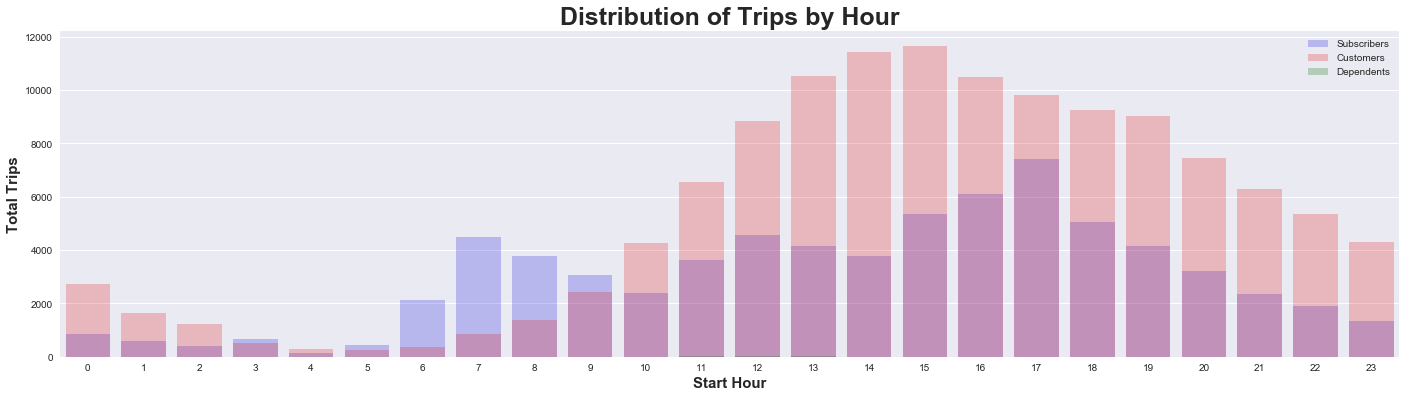

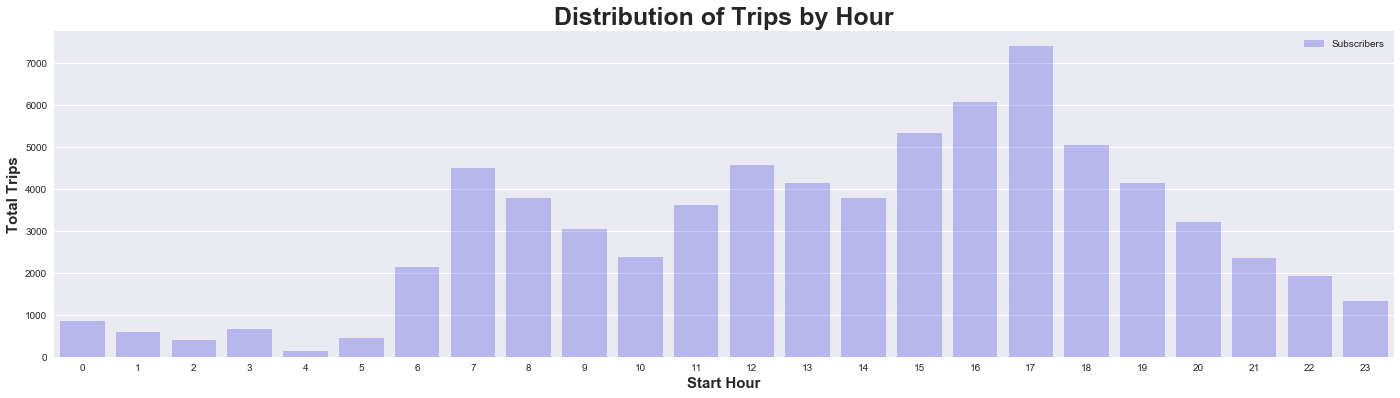

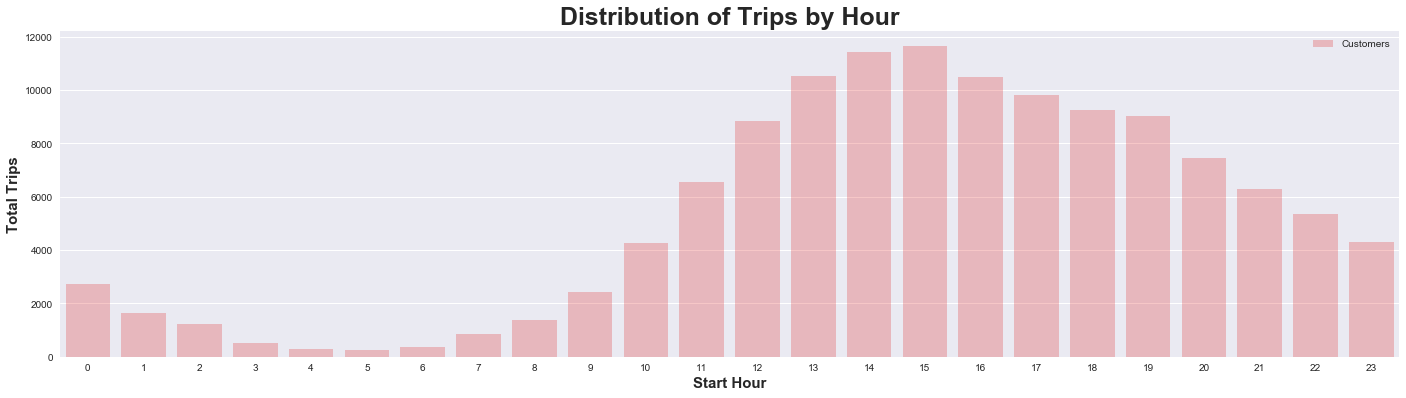

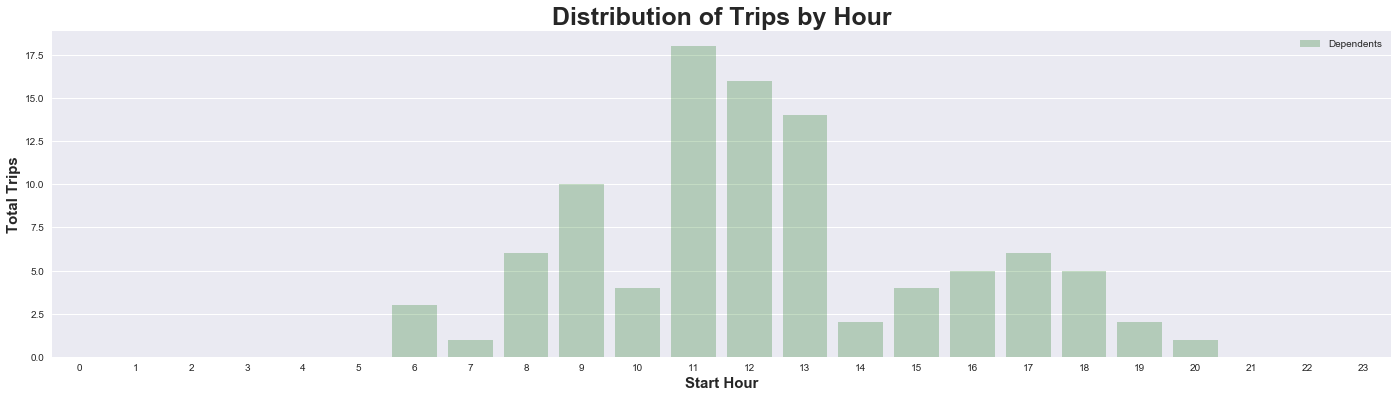

In [103]:

subscriber_data = trip_data[trip_data.user_type == 'Subscriber'].groupby(trip_data.start_date.dt.hour)['trip_id'].count().to_frame()
customer_data   = trip_data[trip_data.user_type == 'Customer'].groupby(trip_data.start_date.dt.hour)['trip_id'].count().to_frame()
dependent_data  = trip_data[trip_data.user_type == 'Dependent'].groupby(trip_data.start_date.dt.hour)['trip_id'].count().to_frame()    

subscriber_data = fill_missing_hours(subscriber_data)
customer_data = fill_missing_hours(customer_data)
dependent_data = fill_missing_hours(dependent_data)

plt.subplots(figsize=(24,6))
ax = sns.barplot(x = sorted(pd.unique(subscriber_data.index)) , y = subscriber_data.trip_id, color='b', alpha = 0.25, label='Subscribers')
sns.barplot(x = sorted(pd.unique(customer_data.index)) , y = customer_data.trip_id, color='r', alpha = 0.25, label='Customers', ax=ax)
sns.barplot(x = sorted(pd.unique(dependent_data.index)) , y = dependent_data.trip_id, color='g', alpha = 0.25, label='Dependents', ax=ax)

ax.set_title('Distribution of Trips by Hour', size=TITLE_FONT_SIZE, weight='bold')
ax.set_xlabel('Start Hour', size=LABEL_FONT_SIZE, weight='bold')
ax.set_ylabel('Total Trips', size=LABEL_FONT_SIZE, weight='bold')
ax.set_xticks(sorted(pd.unique(trip_data.start_date.dt.hour)))

plt.legend()
plt.show()


plt.subplots(figsize=(24,6))
ax = sns.barplot(x = sorted(pd.unique(subscriber_data.index)) , y = subscriber_data.trip_id, color='b', alpha = 0.25, label='Subscribers')

ax.set_title('Distribution of Trips by Hour', size=TITLE_FONT_SIZE, weight='bold')
ax.set_xlabel('Start Hour', size=LABEL_FONT_SIZE, weight='bold')
ax.set_ylabel('Total Trips', size=LABEL_FONT_SIZE, weight='bold')
ax.set_xticks(sorted(pd.unique(trip_data.start_date.dt.hour)))

plt.legend()
plt.show()


plt.subplots(figsize=(24,6))
ax = sns.barplot(x = sorted(pd.unique(customer_data.index)) , y = customer_data.trip_id, color='r', alpha = 0.25, label='Customers')

ax.set_title('Distribution of Trips by Hour', size=TITLE_FONT_SIZE, weight='bold')
ax.set_xlabel('Start Hour', size=LABEL_FONT_SIZE, weight='bold')
ax.set_ylabel('Total Trips', size=LABEL_FONT_SIZE, weight='bold')
ax.set_xticks(sorted(pd.unique(trip_data.start_date.dt.hour)))

plt.legend()
plt.show()


plt.subplots(figsize=(24,6))
ax = sns.barplot(x = sorted(pd.unique(dependent_data.index)) , y = dependent_data.trip_id, color='g', alpha = 0.25, label='Dependents')

ax.set_title('Distribution of Trips by Hour', size=TITLE_FONT_SIZE, weight='bold')
ax.set_xlabel('Start Hour', size=LABEL_FONT_SIZE, weight='bold')
ax.set_ylabel('Total Trips', size=LABEL_FONT_SIZE, weight='bold')
ax.set_xticks(sorted(pd.unique(trip_data.start_date.dt.hour)))

plt.legend()
plt.show()

In [ ]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
trip_data.to_csv('../clean_data/cogo/trip_data_cleaned.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

[16:59:34.791596]	Writing File...


# Load Station Data

In [ ]:
station_data = pd.DataFrame()
station_data = pd.read_csv('../clean_data/station_data_cleaned_final.csv', parse_dates=['first_service_date', 'last_service_date'], index_col=0)

station_data_basic = pd.DataFrame()
# drop duplicated station_id ros, keep first
station_data_basic = station_data.copy()
station_data_basic.drop_duplicates(subset=['station_id'], keep='first', inplace=True)

station_data_basic.drop(['lat', 'long', 'landmark', 'zip_code'], axis=1, inplace=True)

station_data_basic.info()

### Append Service area start and end columns

In [ ]:
trip_data.head(3)

In [ ]:
station_data.head(3)

In [ ]:
print('[%s]\tStarting Area Lookup...' % datetime.datetime.now().time())
trip_data['start_area'] = trip_data['start_terminal'].apply(lambda x: station_data[station_data.station_id == x]['landmark'].iloc[0])
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

print('[%s]\tStarting Area Lookup...' % datetime.datetime.now().time())
trip_data['end_area'] = trip_data['end_terminal'].apply(lambda x: station_data[station_data.station_id == x]['landmark'].iloc[0])
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

In [ ]:
print('[%s]\tStarting Area Lookup...' % datetime.datetime.now().time())
trip_data['start_zip'] = trip_data['start_terminal'].apply(lambda x: station_data[station_data.station_id == x]['zip_code'].iloc[0])
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

print('[%s]\tStarting Area Lookup...' % datetime.datetime.now().time())
trip_data['end_zip'] = trip_data['end_terminal'].apply(lambda x: station_data[station_data.station_id == x]['zip_code'].iloc[0])
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

## Review Special Circumstance Stations

In [ ]:

# Station 26 Review
s26_dates = ['2013-08-29', '2016-08-04']
plot_terminal_trips(trip_data, 26, x_label = 'Date', y_label = 'Trips', title_suffix='Review', draw_dates=s26_dates)

# Station 30 Review
s30_dates = ['2013-08-29', '2015-09-28', '2016-08-31']
plot_terminal_trips(trip_data, 30, x_label = 'Date', y_label = 'Trips', title_suffix='Review', draw_dates=s30_dates)

# Station 33 Review
s33_dates = ['2013-08-29', '2015-09-16', '2016-08-31']
plot_terminal_trips(trip_data, 33, x_label = 'Date', y_label = 'Trips', title_suffix='Review', draw_dates=s33_dates)

# Station 73 Review
s73_dates = ['2013-08-29', '2015-05-19', '2016-08-31']
plot_terminal_trips(trip_data, 73,x_label = 'Date', y_label = 'Trips', title_suffix='Review', draw_dates=s73_dates)

In [ ]:
trip_data.head(5)

In [ ]:
trip_data.info()

In [ ]:
print('[%s]\tWriting File...' % datetime.datetime.now().time())
trip_data.to_csv('../clean_data/trip_data_cleaned_zips.csv', encoding='utf-8')
print('\t[%s]\tComplete!' % datetime.datetime.now().time())

# Load Weather Data

In [ ]:
weather_data = pd.DataFrame()
weather_data = pd.read_csv('../clean_data/weather_cleaned_all.csv', parse_dates=['date'], index_col=['date'])

In [ ]:
weather_data.head()

In [ ]:
pd.unique(weather_data.events)

## Append Weather Data to Trips

In [ ]:
trip_data.head(3)

In [ ]:
print('[%s]\tAppending Weather Data...' % datetime.datetime.now().time())


trip_data = pd.merge(trip_data, 
                      weather_data, 
                      how='left', 
                      left_on=[trip_data['start_date'].dt.date, 'start_zip'], 
                      right_on=[weather_data.index.date, 'zip_code'])
trip_data.drop(['zip_code'], axis=1, inplace=True)
# test.set_index('Trip ID', inplace=True)




print('\t[%s]\tComplete!' % datetime.datetime.now().time())

In [ ]:
trip_data.head(3)

In [ ]:
trip_data.info()

In [ ]:
trip_data.columns

In [ ]:
trip_data.to_csv('../clean_data/trip_data_cleaned_master.csv', encoding='utf-8')